<a href="https://colab.research.google.com/github/superbunny38/2021DataScience/blob/main/10_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/joelgrus/data-science-from-scratch.git book

fatal: destination path 'book' already exists and is not an empty directory.


In [3]:
!mkdir workspace

mkdir: cannot create directory ‘workspace’: File exists


In [4]:
!mv /content/book/scratch workspace

mv: cannot stat '/content/book/scratch': No such file or directory


In [5]:
%cd workspace

/content/workspace


## 1차원 데이터

In [1]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

In [6]:
def bucketize(point: float, bucket_size: float) -> float:#각 데이터를 bucket_size의 배수에 해당하는 구간에 위치시킨다.
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [3]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:#구간을 생성하고 각 구간 안의 데이터 개수를 계산해준다
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

In [4]:
def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [11]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

#-100과 100 사이의 균등 분포
uniform = [200*random.random() -100 for _ in range(10000)]
uniform[:10]

[68.88437030500961,
 51.590880588060486,
 -15.885683833830996,
 -48.21664994140733,
 2.254944273721705,
 -19.01317250991714,
 56.75971780695451,
 -39.33745478421451,
 -4.680609169528836,
 16.676407891006235]

In [12]:
#평균이 0이고 표준편차가 57인 정규분포
normal = [57*inverse_normal_cdf(random.random()) for _ in range(10000)]

In [13]:
normal[:10]

[50.763559341430664,
 18.96437644958496,
 21.814985275268555,
 -78.38902473449707,
 9.092702865600586,
 33.36962699890137,
 -73.94894599914551,
 -59.80679512023926,
 -47.64876365661621,
 -39.27197456359863]

### 분포의 차이 이해하기

uniform, normal 모두 평균이 대략 0, 표준편차가 대략 58이지만 굉장히 다른 모양의 분포를 띈다. 균등분포의 모양은 다음과 같다.

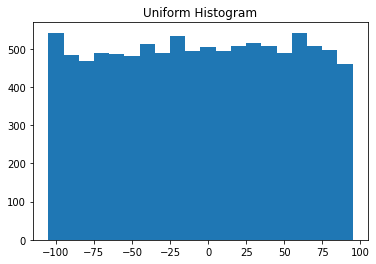

In [14]:
plot_histogram(uniform, 10, "Uniform Histogram")

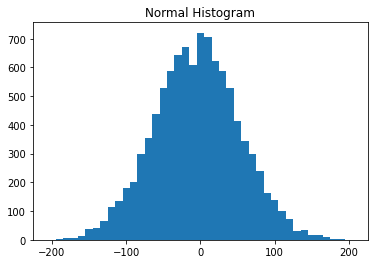

In [16]:
plot_histogram(normal, 10, "Normal Histogram")

## 2차원 데이터

In [17]:
def random_normal() -> float:#표준 정규 분포를 따르는 임의의 데이터를 변환
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [18]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

In [19]:
xs[:10]

[-0.5221271514892578,
 -0.27518272399902344,
 0.5436038970947266,
 -0.03283500671386719,
 2.1323299407958984,
 -0.7730770111083984,
 0.5921840667724609,
 -0.6050968170166016,
 -1.1173343658447266,
 -1.761789321899414]

In [20]:
count = 0
for one, two in zip(ys1, ys2):
  if count >10:
    break
  print(one,two)
  count+=1

-0.5430078506469727 0.3635740280151367
-0.7516717910766602 0.3903627395629883
0.4345273971557617 -1.1683225631713867
0.17117023468017578 0.13103961944580078
1.1177778244018555 -1.3953638076782227
-1.0557126998901367 0.8678483963012695
0.790858268737793 -1.2434053421020508
-1.0265398025512695 0.9239816665649414
-1.817612648010254 0.22305965423583984
-1.6959810256958008 1.7318105697631836
-0.5400514602661133 0.3174161911010742


ys1, ys2의 평균과 표준편차는 동일하다

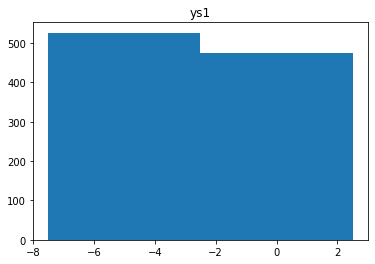

In [23]:
plot_histogram(ys1, 5, "ys1")

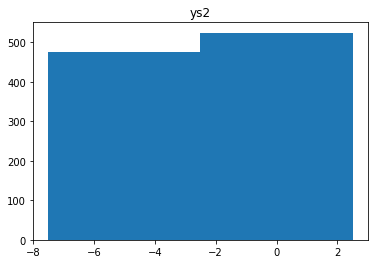

In [24]:
plot_histogram(ys2, 5, "ys2")

결합확률분포는 다르다

Text(0.5, 1.0, 'Very Different Joint Distributions')

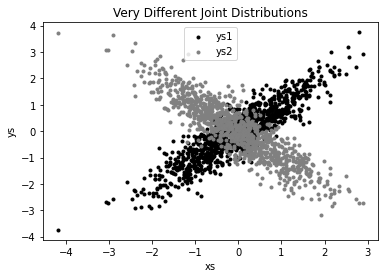

In [21]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
# plt.show()

상관관계를 통해 차이를 확인할 수도 있다

0.9010493686379609

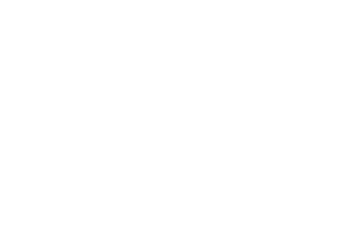

In [29]:
from scratch.statistics import correlation
plt.gca().clear()
plt.axis('off')
correlation(xs, ys1)

-0.8920981526880033

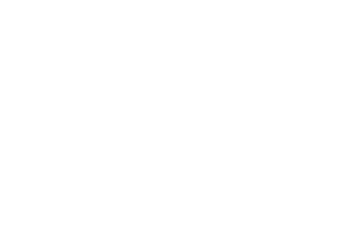

In [30]:
plt.gca().clear()
plt.axis('off')
correlation(xs, ys2)

## 다차원 데이터

상관관계 행렬로 어떻게 연관되어있는지 살펴보기<br>
상관관계 행렬의 i번째 행과 j번째 열에 해당하는 값은 i번째 차원과 j번째 차원의 상관관계 행렬을 나타냄

In [9]:
from scratch.linear_algebra import Matrix, Vector, make_matrix

In [10]:
def correlation_matrix(data: List[Vector])->Matrix:
  def correlation_ij(i: int, j: int) -> float:
    return correlation(data[i], data[j])
  return make_matrix(len(data), len(data), correlation_ij)

만약 차원의 수가 많지 않다면 산포도행렬(scatterplotmatrix)를 이용해서 각 차원의 쌍별로 산포도를 시각화할 수 있다.

In [11]:
import pandas as pd
corr_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [12]:
corr_data = corr_data[["housing_median_age","total_rooms","population","median_income"]]

In [13]:
corr_data

,housing_median_age,total_rooms,population,median_income
0,15.0,5612.0,1015.0,1.4936
1,19.0,7650.0,1129.0,1.8200
2,17.0,720.0,333.0,1.6509
3,14.0,1501.0,515.0,3.1917
4,20.0,1454.0,624.0,1.9250
...,...,...,...,...
16995,52.0,2217.0,907.0,2.3571
16996,36.0,2349.0,1194.0,2.5179
16997,17.0,2677.0,1244.0,3.0313
16998,19.0,2672.0,1298.0,1.9797


In [31]:
corr_data.dtypes

housing_median_age    float64
total_rooms           float64
population            float64
median_income         float64
dtype: object

In [15]:
corr_data.columns

Index(['housing_median_age', 'total_rooms', 'population', 'median_income'], dtype='object')

In [21]:
real_corr_data = []
for col in corr_data.columns:
  real_corr_data.append(list(corr_data[col][:100]))

In [22]:
len(real_corr_data)

4

In [33]:
len(real_corr_data[0])

100

In [36]:
real_corr_data[0][:10]

[15.0, 19.0, 17.0, 14.0, 20.0, 29.0, 25.0, 41.0, 34.0, 46.0]

In [32]:
num_vectors = len(real_corr_data)
num_vectors

4

In [39]:
columns = corr_data.columns

In [40]:
columns

Index(['housing_median_age', 'total_rooms', 'population', 'median_income'], dtype='object')

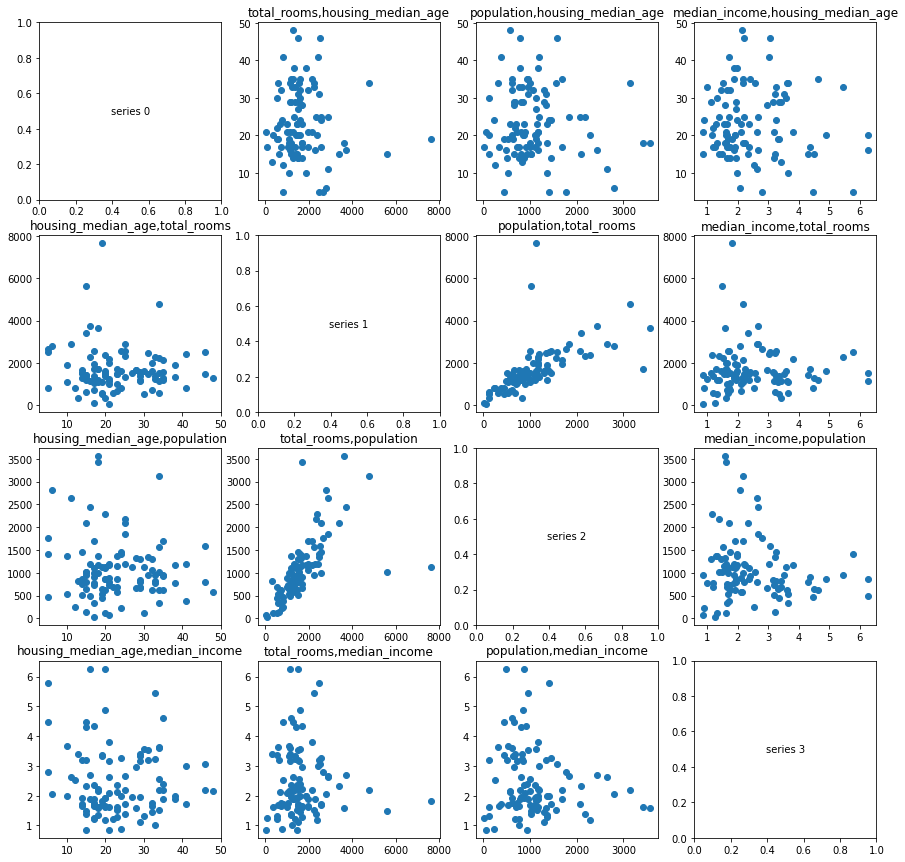

In [53]:
num_vectors = len(real_corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors, figsize=(15,15))

for i in range(num_vectors):
  for j in range(num_vectors):
    if i!= j:
      ax[i][j].scatter(real_corr_data[j],real_corr_data[i])
      ax[i][j].set_title("{},{}".format(columns[j], columns[i]))
    else:
      ax[i][j].annotate("series "+str(i), (0.5,0.5),ha = "center", va= "center")

### NamedTuple 사용하기

In [54]:
import datetime
stock_price = {'closing_price':102.06,
               'date': datetime.date(2014,8,29),
               'symbol':'AAPL'}

In [55]:
stock_price

{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL'}

다양한 타입의 값을 들고 있는 딕셔너리를 표현할 수 있는 좋은 어노테이션 방법은 없다

In [57]:
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018,12,14), 106.03)

In [58]:
price.symbol

'MSFT'

In [59]:
price.closing_price

106.03

어노테이션 문제 해결하기 위해선 NamedTuple 사용

In [61]:
from typing import NamedTuple

class StockPrice(NamedTuple):
  symbol:str
  date: datetime.date
  closing_price: float

  def is_high_tech(self)->bool:
    return self.symbol in ['MSFT','GOOG','FB','AMZN','AAPL']

In [62]:
price = StockPrice('MSFT', datetime.date(2018,12,14),106.03)

In [63]:
price.symbol

'MSFT'

In [64]:
price.closing_price

106.03

In [65]:
price.is_high_tech()

True

### Data classes

데코레이터(@) 활용

In [66]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
  symbol:str
  date: datetime.date
  closing_price: float

  def is_high_tech(self)->bool:
    return self.symbol in ['MSFT','GOOG','FB','AMZN','AAPL']

In [67]:
price2 = StockPrice2('MSFT',datetime.date(2018,12,14),106.03)

NamedTuple과 dataclasses의 가장 큰 차이:
dataclasses의 인스턴스 값을 수정할 수 있다는 점

In [68]:
price2.closing_price /= 2

### 정제하고 합치기

In [70]:
from dateutil.parser import parse

In [71]:
def parse_row(row:List[str])->StockPrice:
  symbol, date, closing_price = row
  return StockPrice(symbol = symbol, date = parse(date).date(), closing_price = float(closing_price))

In [72]:
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

나쁜 데이터가 포함되어 있다면 None으로 파싱하기

In [77]:
from contextlib import nullcontext
from typing import Optional
import re

def try_parse_row(row: List[str])->Optional[StockPrice]:
  symbol, date_, closing_price_ = row

  #주가 심벌은 모두 대문자로 구성되어 있다.
  if not re.match(r"^[A-Z]+$",symbol):
    return None
  
  try:
    date = parse(date_).date()

  except ValueError:
    return None
  
  try:
    closing_price = float(closing_price_)
  except ValueError:
    return None
  return StockPrice(symbol, date, closing_price)

In [78]:
# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

나쁜 주가 데이터가 포함되어 있을 때 유효한 행만 파싱할 수 있다

In [80]:
#나쁜 주가 데이터 출력
import csv

with open("/content/book/comma_delimited_stock_prices.csv", "r") as f:
  for line in f:
    print(line.strip())

AAPL,6/20/2014,90.91
MSFT,6/20/2014,41.68
FB,6/20/3014,64.5
AAPL,6/19/2014,91.86
MSFT,6/19/2014,n/a
FB,6/19/2014,64.34


In [82]:
import csv
data: List[StockPrice] = []
with open("/content/book/comma_delimited_stock_prices.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
      maybe_stock = try_parse_row(row)
      if maybe_stock is None:
        print(f"skipping invalid row: {row}")
      else:
        data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


In [83]:
data

[StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91),
 StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68),
 StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5),
 StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
 StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34)]

### 데이터 처리

### 척도 조절

유클리드 거리 함수 distance

In [88]:
#사람, 키(인치), 키(cm), 몸무게(파운드)
data = [['A',63,160,150],['B',67,170.2,160],['C',70,177.8,171]]
df = pd.DataFrame(data)
df.columns = ['사람', '키(인치)', '키(cm)', '몸무게(파운드)']
df

,사람,키(인치),키(cm),몸무게(파운드)
0,A,63,160.0,150
1,B,67,170.2,160
2,C,70,177.8,171


In [89]:
from scratch.linear_algebra import distance
#인치 사용
a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40

In [90]:
min(a_to_b, a_to_c, b_to_c)#b와 가장 가까운 체형: a

10.770329614269007

In [91]:
#cm 사용
a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

In [92]:
min(a_to_b, a_to_c, b_to_c)#b와 가장 가까운 체형: c

13.370115930686627

키의 척도에 따라 결과가 달라짐

### 해결책: 각 차원의 평균을 0, 표준편차를 1로 변환시키면 척도 조절 가능

In [ ]:
from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:#각 열의 평균 mean과 표준편차 standard_deviation을 계산
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

In [94]:
vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)

In [103]:
len(vectors)

3

In [95]:
means

[-1.0, 0.0, 1.0]

In [96]:
stdevs

[2.0, 1.0, 0.0]

In [114]:
def rescale(data: List[Vector])->List[Vector]:
  """각 열의 평균을 0, 표준편차를 1로 변환하면서 입력되는 데이터의 척도를 조절. 편차가 없는 열은 그대로 유지"""
  dim = len(data[0])
  means, stdevs = scale(data)

  #각 벡터의 복사본을 생성
  rescaled = [v[:] for v in data]

  for v in rescaled:
    for i in range(dim):
      if stdevs[i] > 0:
        v[i] = (v[i]-means[i])/stdevs[i]

  return rescaled

In [115]:
means, stdevs = scale(rescale(vectors))

In [116]:
means == [0, 0, 1]

True

In [117]:
stdevs == [1, 1, 0]

True

In [113]:
vectors2 = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1],[4,3,1]]
mea, stde = scale(vectors2)

In [106]:
pd.DataFrame(vectors2)

,0,1,2
0,-3,-1,1
1,-1,0,1
2,1,1,1
3,4,3,1


In [105]:
mea

[0.25, 0.75, 1.0]

아까 data(real_corr_data) 표준화해보기

In [98]:
len(real_corr_data)

4

In [110]:
import numpy as np
m, std = scale(list(np.array(real_corr_data).T))

In [111]:
m

[23.16, 1677.8500000000001, 1077.71, 2.462202]

In [112]:
std

[9.23401704065304, 1070.4545279761517, 675.5595854063084, 1.1684843105649145]

## tqdm: 진행 표시줄 생성

이터러블(하나씩 차례로 반환 가능한 객체)을 tqdm.tqdm으로 감사면 진행표시줄이 생성됨

In [118]:
import tqdm

In [120]:
import random
for i in tqdm.tqdm(range(100)):
  _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:18<00:00,  5.31it/s]


In [121]:
from typing import List
def primes_up_to(n:int)->List[int]:
  primes = [2]

  with tqdm.trange(3,n) as t:#range를 tqdm으로 감싸는 대신 활용
    for i in t:
      #i가 더 작은 소수로 나뉘지 않는다면 소수
      i_is_prime = not any(i%p == 0 for p in primes)
      if i_is_prime:
        primes.append(i)

      t.set_description(f"{len(primes)} primes")#with를 통해 진행표시줄의 설명 설정 가능
  return primes

In [122]:
my_primes = primes_up_to(100_000)

5932 primes:  59%|█████▊    | 58610/99997 [02:09<01:31, 453.55it/s]


KeyboardInterrupt: ignored

## 차원 축소

주성분 분석(Principal Component Analysis)를 통해 데이터의 편차를 최대한 포착하는 차원을 찾아낼 수 있음

In [6]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

In [10]:
import pandas as pd
df = pd.DataFrame(pca_data)

In [12]:
df

,0,1
0,20.966678,-13.113808
1,22.771991,-19.889089
2,25.668710,-11.995600
3,18.001979,-18.198919
4,21.396740,-10.889313
...,...,...
94,22.974620,-10.617116
95,34.632712,-9.261824
96,34.704251,-6.963075
97,15.656395,-17.219696


original data with wrong axis

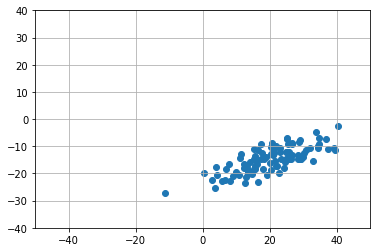

In [28]:
plt.scatter(df[0],df[1])
plt.ylim(-40,40)
plt.xlim(-50,50)
plt.grid(True)
plt.show()

#### alter data to have mean as 0 for each dimension

In [25]:
from scratch.linear_algebra import subtract
from scratch.linear_algebra import Matrix, Vector, make_matrix
from scratch.linear_algebra import vector_mean
def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [26]:
mean_df = de_mean(pca_data)
mean_df = pd.DataFrame(mean_df)

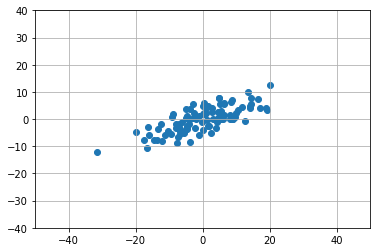

In [30]:
plt.scatter(mean_df[0],mean_df[1])
plt.ylim(-40,40)
plt.xlim(-50,50)
plt.grid(True)
plt.show()#원점으로 모임(평균을 제거한 데이터)

이제 어떤 방향이 데이터의 편차를 가장 많이 잡아내는지 알아볼 수 있다

In [31]:
from scratch.linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [32]:
from scratch.linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

편차를 최대화하는 방향을 찾기 위해 경사하강법을 사용

In [33]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

제1 주성분은 directional_variance 함수를 최대화시키는 방향

In [37]:
from scratch.gradient_descent import gradient_step
import tqdm
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

In [38]:
mean_pca_data = de_mean(pca_data)

In [40]:
dir = first_principal_component(mean_pca_data)

dv: 10279.151: 100%|██████████| 100/100 [00:00<00:00, 173.84it/s]


In [41]:
dir

[0.9237307801943212, 0.3830423549969252]

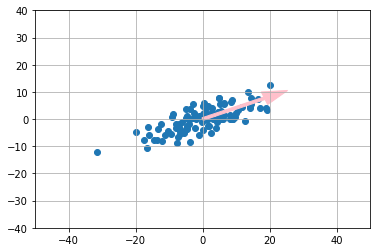

In [53]:
move_x = dir[0]
move_y = dir[1]

plt.scatter(mean_df[0],mean_df[1])
plt.ylim(-40,40)
plt.xlim(-50,50)
plt.arrow(0,0, move_x*20, move_y*20,head_width = 5,
          width = 1,
          color ='pink')
plt.grid(True)
plt.show()#원점으로 모임(평균을 제거한 데이터)

In [55]:
from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    #v를 w 방향으로 투영
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

다른 성분들을 찾고 싶다면 먼저 투영된 데이터를 제거해야 한다

In [56]:
from scratch.linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

고차원 데이터에서는 이러한 반복적인 과정에서 원하는 만큼 많은 주성분을 찾을 수 있다

In [59]:
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

계산된 성분을 사용하면 주어진 데이터를 저차원 공간에서 생성시킬 수 있다

In [60]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

차원 축소의 중요성:
1. 잡음에 해당되는 차원을 제거&연관된 차우너을 합쳐 주며 데이터 정제
2. 저차원으로 축소된 데이터에서 다양한 기법 사용 가능